In [43]:
from sklearn.model_selection import train_test_split
from preamble import *
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:

df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

df.loc[df['shares'] <= 1400, 'split'] = 0
df.loc[df['shares'] > 1400, 'split'] = 1

df['split']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
39614    0.0
39615    1.0
39616    1.0
39617    0.0
39618    0.0
39619    0.0
39620    1.0
39621    1.0
39622    1.0
39623    0.0
39624    1.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39629    1.0
39630    1.0
39631    0.0
39632    1.0
39633    1.0
39634    0.0
39635    0.0
39636    1.0
39637    0.0
39638    0.0
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: split, Length: 39644, dtype: float64

In [3]:
df.shape


(39644, 62)

In [4]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]
print(dfr12)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [5]:
#removing the attributes url and timedelta which are non predictive variables and retaining no of shares for plotting
dfshares = df.iloc[:, 2:61]
print(dfshares)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [6]:
data=dfr12

In [7]:
data.head()
data.shape[1]
data.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [8]:
target=  df.iloc[:,61]

In [9]:
print(target)


0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
39614    0.0
39615    1.0
39616    1.0
39617    0.0
39618    0.0
39619    0.0
39620    1.0
39621    1.0
39622    1.0
39623    0.0
39624    1.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39629    1.0
39630    1.0
39631    0.0
39632    1.0
39633    1.0
39634    0.0
39635    0.0
39636    1.0
39637    0.0
39638    0.0
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: split, Length: 39644, dtype: float64


In [10]:
print(target)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
39614    0.0
39615    1.0
39616    1.0
39617    0.0
39618    0.0
39619    0.0
39620    1.0
39621    1.0
39622    1.0
39623    0.0
39624    1.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39629    1.0
39630    1.0
39631    0.0
39632    1.0
39633    1.0
39634    0.0
39635    0.0
39636    1.0
39637    0.0
39638    0.0
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: split, Length: 39644, dtype: float64


In [11]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [12]:
from sklearn.model_selection import train_test_split
X_traingp, X_testgp, y_traingp, y_testgp = train_test_split(
    dfshares, target, random_state=0)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [15]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


In [16]:
print("X_train shape: {}".format(X_train.shape))
print(len(X_train.index))

X_train shape: (29733, 58)
29733


In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))



transformed shape: (29733, 58)
per-feature minimum before scaling:
 n_tokens_title                   2.00
n_tokens_content                 0.00
n_unique_tokens                  0.00
n_non_stop_words                 0.00
n_non_stop_unique_tokens         0.00
num_hrefs                        0.00
num_self_hrefs                   0.00
num_imgs                         0.00
num_videos                       0.00
average_token_length             0.00
num_keywords                     1.00
data_channel_is_lifestyle        0.00
data_channel_is_entertainment    0.00
data_channel_is_bus              0.00
data_channel_is_socmed           0.00
data_channel_is_tech             0.00
data_channel_is_world            0.00
kw_min_min                      -1.00
kw_max_min                       0.00
kw_avg_min                      -1.00
kw_min_max                       0.00
kw_max_max                       0.00
kw_avg_max                       0.00
kw_min_avg                      -1.00
kw_max_avg          

In [18]:
Unpopular = X_test[y_test.values==0]
print(Unpopular.iloc[1,3])
print(X_test.columns.values)



0.999999996
['n_tokens_title' 'n_tokens_content' 'n_unique_tokens' 'n_non_stop_words'
 'n_non_stop_unique_tokens' 'num_hrefs' 'num_self_hrefs' 'num_imgs'
 'num_videos' 'average_token_length' 'num_keywords'
 'data_channel_is_lifestyle' 'data_channel_is_entertainment'
 'data_channel_is_bus' 'data_channel_is_socmed' 'data_channel_is_tech'
 'data_channel_is_world' 'kw_min_min' 'kw_max_min' 'kw_avg_min'
 'kw_min_max' 'kw_max_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg'
 'kw_avg_avg' 'self_reference_min_shares' 'self_reference_max_shares'
 'self_reference_avg_sharess' 'weekday_is_monday' 'weekday_is_tuesday'
 'weekday_is_wednesday' 'weekday_is_thursday' 'weekday_is_friday'
 'weekday_is_saturday' 'weekday_is_sunday' 'is_weekend' 'LDA_00' 'LDA_01'
 'LDA_02' 'LDA_03' 'LDA_04' 'global_subjectivity'
 'global_sentiment_polarity' 'global_rate_positive_words'
 'global_rate_negative_words' 'rate_positive_words' 'rate_negative_words'
 'avg_positive_polarity' 'min_positive_polarity' 'max_positive_polari

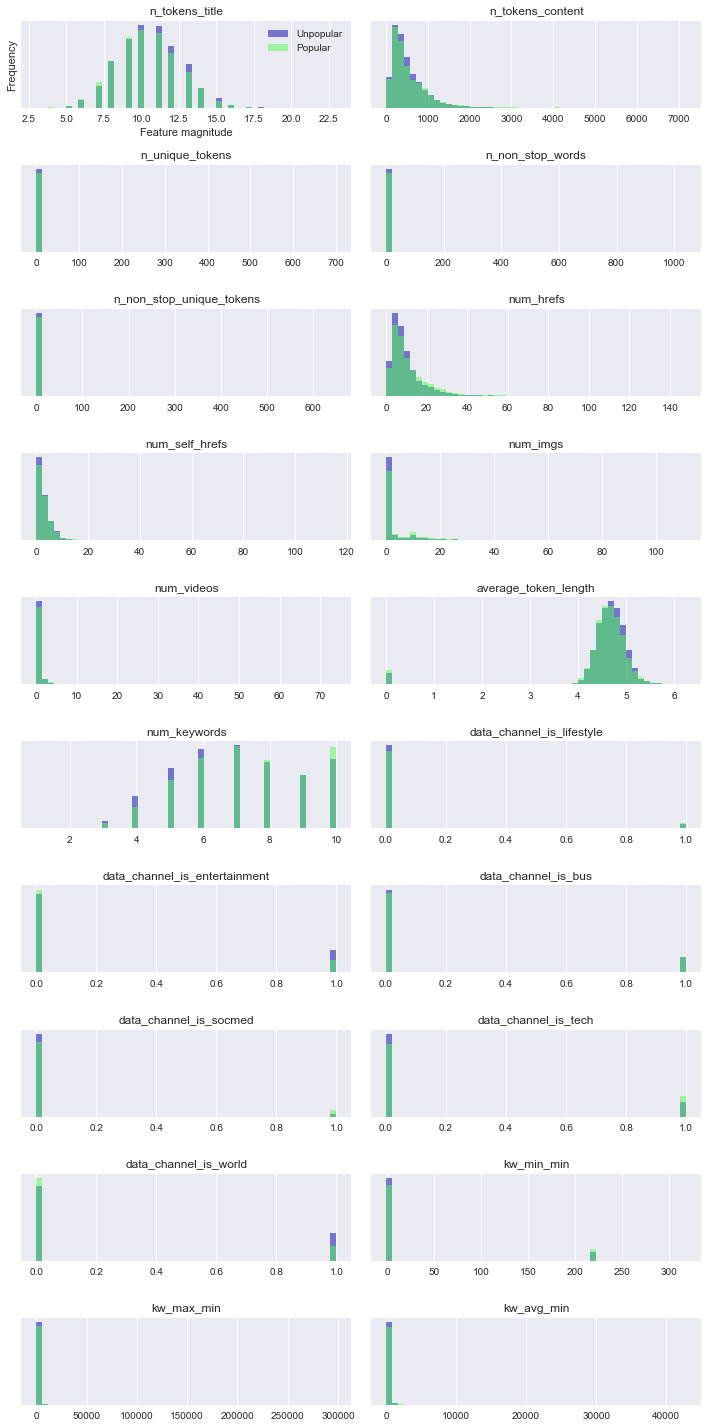

In [19]:
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
Unpopular = X_test[y_test.values==0]
Popular = X_test[y_test.values==1]

ax = axes.ravel()

for i in range(20):
    _, bins = np.histogram(X_test.iloc[:, i], bins=50)
    ax[i].hist(Unpopular.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(Popular.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(X_test.columns.values[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Unpopular", "Popular"], loc="best")
fig.tight_layout()
plt.savefig('test.pdf')






IndexError: index 20 is out of bounds for axis 0 with size 20

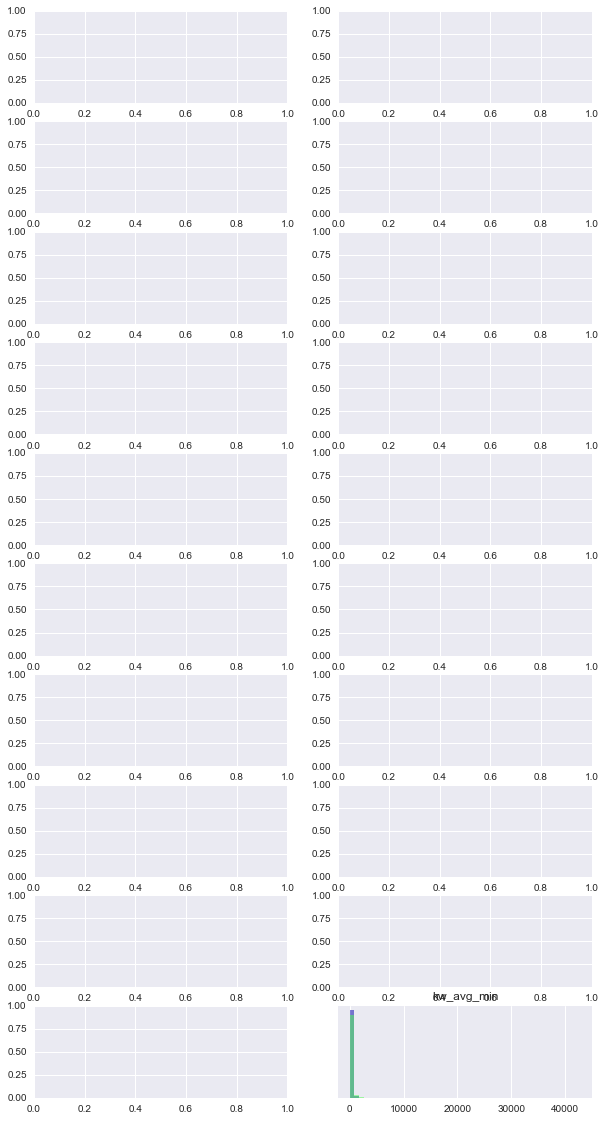

In [20]:
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
Unpopular = X_test[y_test.values==0]
Popular = X_test[y_test.values==1]

ax = axes.ravel()

for i in range(19,23):
    _, bins = np.histogram(X_test.iloc[:, i], bins=50)
    ax[i].hist(Unpopular.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(Popular.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(X_test.columns.values[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Unpopular", "Popular"], loc="best")
fig.tight_layout()
plt.savefig('test.pdf')


IndexError: index 20 is out of bounds for axis 0 with size 20

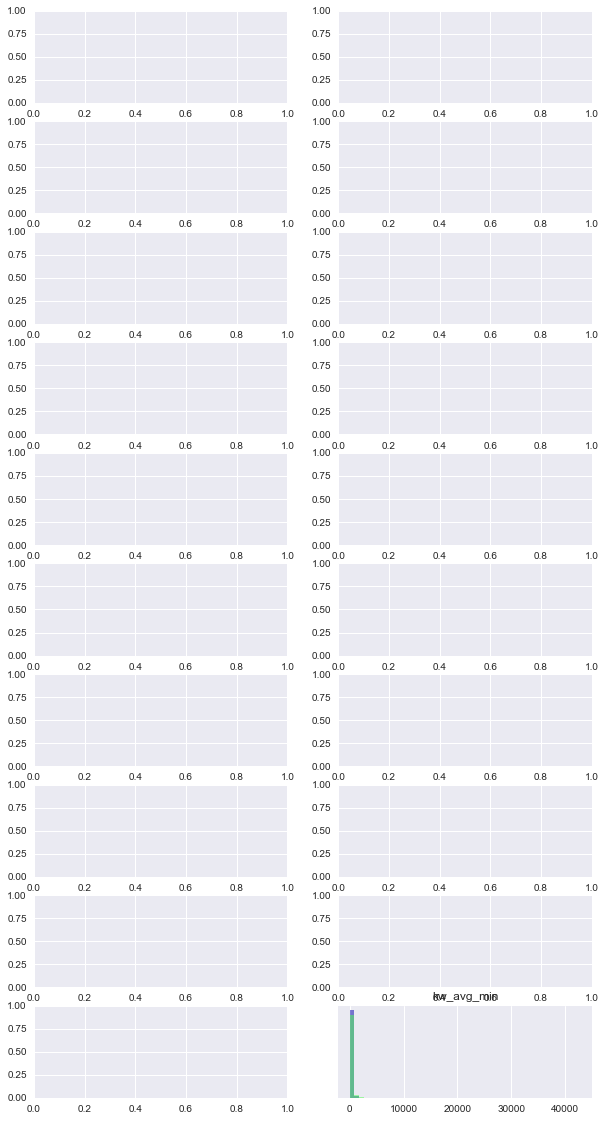

In [21]:
fig, axes = plt.subplots(10, 2, figsize=(10,20 ))
Unpopular = X_test[y_test.values==0]
Popular = X_test[y_test.values==1]

ax = axes.ravel()

for i in range(19,25):
    _, bins = np.histogram(X_test.iloc[:, i], bins=50)
    ax[i].hist(Unpopular.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(Popular.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(X_test.columns.values[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Unpopular", "Popular"], loc="best")
fig.tight_layout()




plt.savefig('test.pdf')


In [27]:
#PCA for visualization.....first scaling the data ,applying PCA and then plotting a scatter plot
data.head()

scaler = StandardScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)

C:\Users\Kapila\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


[  8.22  15.08]
Original shape: (39644, 58)
Reduced shape: (39644, 2)


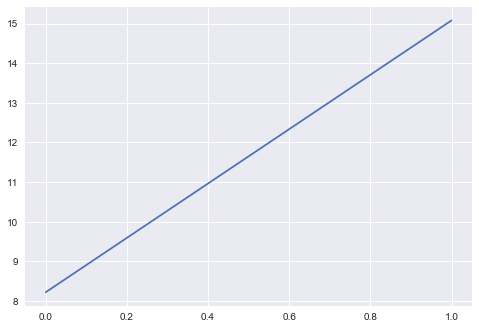

In [28]:
# keep the first two principal components of the data
randomized_pca = RandomizedPCA(n_components=2)
# fit PCA model 
randomized_pca.fit(X_scaled)


#The amount of variance that each PC explains
var= randomized_pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(randomized_pca.explained_variance_ratio_, decimals=4)*100)

print(var1)


plt.plot(var1)
# transform data onto the first two principal components
X_pca =randomized_pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

In [23]:
# keep the first two principal components of the data
randomized_pca = RandomizedPCA(n_components=50)
# fit PCA model 
randomized_pca.fit(X_scaled)


#The amount of variance that each PC explains
var= randomized_pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(randomized_pca.explained_variance_ratio_, decimals=4)*100)

print(var1)


plt.plot(var1)
# transform data onto the first two principal components
X_pca =randomized_pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

C:\Users\Kapila\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'X_scaled' is not defined

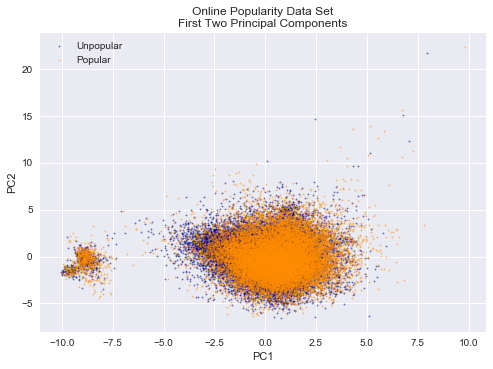

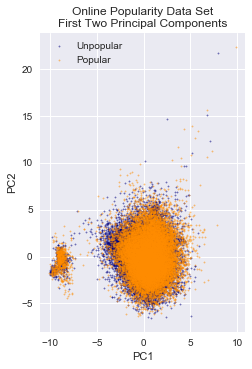

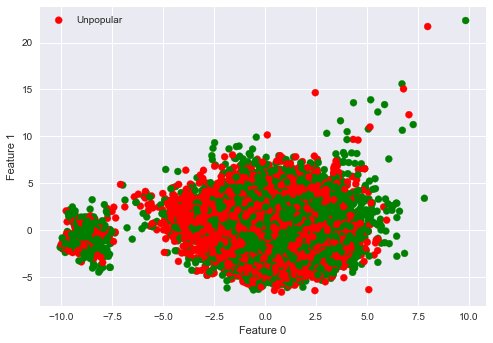

IndexError: index 2 is out of bounds for axis 1 with size 2

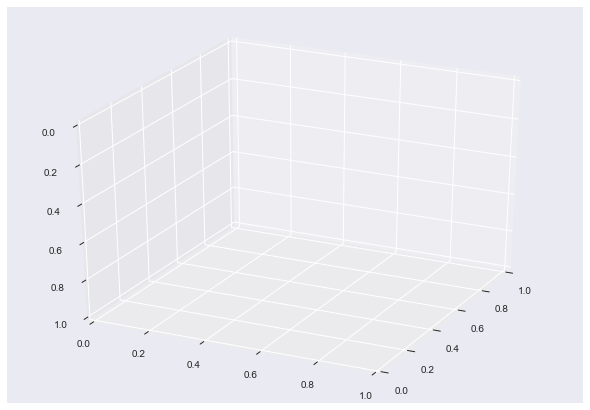

In [29]:


#plt.figure(dpi=120)
plt.scatter(X_pca[target.values==0,0], X_pca[target.values==0,1], alpha=0.5, label='Unpopular', s=2, color='navy')
plt.scatter(X_pca[target.values==1,0], X_pca[target.values==1,1], alpha=0.5, label='Popular', s=2, color='darkorange')
plt.legend()
plt.title('Online Popularity Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


#plt.figure(dpi=120)
plt.scatter(X_pca[target.values==0,0], X_pca[target.values==0,1], alpha=0.5, label='Unpopular', s=2, color='navy')
plt.scatter(X_pca[target.values==1,0], X_pca[target.values==1,1], alpha=0.5, label='Popular', s=2, color='darkorange')
plt.legend()
plt.title('Online Popularity Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

# plot first vs. second principal component, colored by class
#plt.figure(figsize=(8, 8))
#mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], target.values)
#plt.legend('popular','unpopular', loc="best")
#plt.gca().set_aspect("equal")
#plt.xlabel("First principal component")
#plt.ylabel("Second principal component")


#color= ['red' if l == 0 else 'green' for l in target.values]
#plt.scatter(X_pca[:, 0], X_pca[:, 1], color=color)

color= ['red' if l == 0 else 'green' for l in target.values]
plt.scatter(X_pca[:, 0], X_pca[:, 1],color=color)
plt.legend(('Unpopular', 'Popular'), loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1

ax.scatter(X_pca[target.values==0, 0], X_pca[target.values==0, 1], X_pca[target.values==0, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_pca[target.values==1, 0], X_pca[target.values==1, 1], X_pca[target.values==1, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")









In [ ]:
X_pca[:, 0]

In [ ]:
X_pca[:, 1]

In [ ]:
X_pca[:, 0].shape

In [ ]:
X_pca.shape


In [ ]:
target

In [ ]:
print("Type of data: {}".format(type(target)))

In [ ]:
target.values

In [ ]:
c=target.values

In [ ]:
print(X_pca)
print("Type of data: {}".format(type(X_pca)))


In [ ]:
bins = np.bincount(X_train['n_tokens_title'])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")


#important graph

#plt.bar(df['shares'] ,color='grey')
#plt.ylabel("Number of appearances")
#plt.xlabel("Value")

In [31]:
#Automatic Feature Selection
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (29733, 58)
X_train_selected.shape: (29733, 29)


[False False  True False  True  True False  True False False  True False
  True False  True  True  True  True False False False False False  True
  True  True  True  True  True False False False False False  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False False False False False False False  True False False]


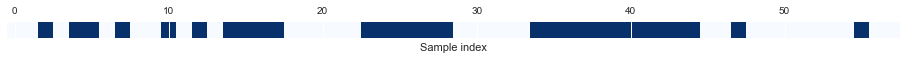

In [32]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='Blues')
plt.xlabel("Sample index")
plt.yticks(())
plt.savefig("figure.png")

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from  sklearn.metrics  import  classification_report

# transform test data
X_test_selected = select.transform(X_test)

lr1 = LogisticRegression().fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr1.score(X_test, y_test)))
lr2=LogisticRegression().fit(X_train_selected, y_train)
pred_logreg  =  lr2.predict(X_test_selected)
print("Score with only selected features: {:.3f}".format(
    lr2.score(X_test_selected, y_test)))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

print("f1 score logistic regression with only selcted features: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

print ( classification_report (y_test,pred_logreg , target_names = [ "Unpopular" ,  "Popular" ]))

Score with all features: 0.609
Score with only selected features: 0.641
Confusion matrix:
[[3272 1803]
 [1757 3079]]
f1 score logistic regression with only selcted features: 0.63
             precision    recall  f1-score   support

  Unpopular       0.65      0.64      0.65      5075
    Popular       0.63      0.64      0.63      4836

avg / total       0.64      0.64      0.64      9911



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

In [ ]:
#Model based selection

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

In [ ]:
#Iterative feature selction
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

print("Test score: {:.3f}".format(select.score(X_test, y_test)))